## 1. Data Collection and Cleaning

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline
#These lines are only for visual plots

df1 = pd.read_csv('inputs/male_players.csv')
df2 = pd.read_csv('inputs/female_players.csv') #We open the inputs datasets

df1['gender'] = 'M'
df2['gender'] = 'F' #We add a new label to these dataset, to differentiate men and women players

df = pd.concat([df1, df2]) #Now, we can concatenate the two datasets

df.drop(df.filter(regex="Unname"),axis=1, inplace=True) #We have to remove the additional "index" columns from the original dataset

df.to_csv('outputs/full_players.csv', index = False) #We save the final dataset on which we will work on as a csv file.

In [44]:
df = pd.read_csv('outputs/full_players.csv')
df.head()

player_id                                         player_url  fifa_version  \
0      18115  /player/18115/ruben-miguel-santos-fernandes/24...          24.0   
1      19541                  /player/19541/glenn-morris/240002          24.0   
2      20801   /player/20801/c-ronaldo-dos-santos-aveiro/240002          24.0   
3      23823             /player/23823/andreas-johansson/240002          24.0   
4      24630        /player/24630/jose-manuel-reina-paez/240002          24.0   

   fifa_update update_as_of         short_name  \
0          2.0   2023-09-22    Rúben Fernandes   
1          2.0   2023-09-22          G. Morris   
2          2.0   2023-09-22  Cristiano Ronaldo   
3          2.0   2023-09-22       A. Johansson   
4          2.0   2023-09-22         Pepe Reina   

                                   long_name player_positions  overall  \
0  Rúben Miguel Marques dos Santos Fernandes               CB       71   
1                         Glenn James Morris               GK       62   
2        Cristiano Ronaldo dos Santos Aveiro               ST       86   
3               Karl Tommy Andreas Johansson               CB       65   
4                     José Manuel Reina Páez               GK       77   

   potential  ...   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk gender  
0         71  ...  69+2  69+2  66+2  67+2    71    71    71  67+2  18+2      M  
1         62  ...  32+2  32+2  27+2  26+2  28+2  28+2  28+2  26+2  61+1      M  
2         86  ...  57+3  57+3  59+3  56+3  52+3  52+3  52+3  56+3  19+3      M  
3         65  ...    65    65  58+2  58+2    65    65    65  58+2  18+2      M  
4         77  ...  34+3  34+3  30+3  30+3  32+3  32+3  32+3  30+3  76+1      M  

[5 rows x 110 columns]

In [45]:
print('Shape:', df.shape,'\n')
print(df.columns)

Shape: (20189, 110) 

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=110)


In [46]:
#From these methods, we can notice that we will work on a dataset of 20189 players from FIFA 2024, based on 110 columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20189 entries, 0 to 20188
Columns: 110 entries, player_id to gender
dtypes: float64(20), int64(43), object(47)
memory usage: 16.9+ MB


In [47]:
df.isna().sum()

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
cb              0
rcb             0
rb              0
gk              0
gender          0
Length: 110, dtype: int64

There are no "abnormal" missing values, since players without contracts or clubs are not "free players" who have not yet found a club.
Players without transfer clauses are due to the fact that this function is forbidden in several countries.

## 1.1. Basic Data Summary

In [48]:
df.describe()

player_id  fifa_version  fifa_update       overall     potential  \
count   20189.000000       20189.0      20189.0  20189.000000  20189.000000   
mean   244343.004656          24.0          2.0     66.476398     71.756749   
std     26545.971892           0.0          0.0      7.092395      6.492334   
min     18115.000000          24.0          2.0     47.000000     48.000000   
25%    227776.000000          24.0          2.0     62.000000     67.000000   
50%    247833.000000          24.0          2.0     66.000000     72.000000   
75%    266568.000000          24.0          2.0     71.000000     76.000000   
max    278145.000000          24.0          2.0     91.000000     94.000000   

          value_eur       wage_eur           age     height_cm     weight_kg  \
count  1.997600e+04   19990.000000  20189.000000  20189.000000  20189.000000   
mean   3.590411e+06    8032.151076     25.214770    180.516073     73.857546   
std    9.131447e+06   18021.898649      4.728694      7.748237      8.052287   
min    1.000000e+04     500.000000     16.000000    149.000000     45.000000   
25%    5.000000e+05     950.000000     21.000000    175.000000     69.000000   
50%    1.100000e+06    2000.000000     25.000000    181.000000     74.000000   
75%    2.400000e+06    7000.000000     29.000000    186.000000     79.000000   
max    1.850000e+08  350000.000000     43.000000    206.000000    105.000000   

       ...  mentality_composure  defending_marking_awareness  \
count  ...         20189.000000                 20189.000000   
mean   ...            58.501263                    47.192134   
std    ...            12.408866                    20.753115   
min    ...            12.000000                     3.000000   
25%    ...            51.000000                    30.000000   
50%    ...            60.000000                    53.000000   
75%    ...            67.000000                    64.000000   
max    ...            96.000000                    92.000000   

       defending_standing_tackle  defending_sliding_tackle  \
count               20189.000000              20189.000000   
mean                   49.198920                 46.772203   
std                    21.292019                 20.727799   
min                     8.000000                  6.000000   
25%                    30.000000                 27.000000   
50%                    57.000000                 54.000000   
75%                    66.000000                 64.000000   
max                    92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        20189.000000          20189.000000         20189.000000   
mean            16.433602             16.233345            16.146218   
std             17.836996             17.203746            16.971859   
min              2.000000              2.000000             2.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             90.000000            91.000000   

       goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  
count             20189.000000          20189.000000        2261.000000  
mean                 16.281242             16.532914          35.725785  
std                  17.399639             18.147606          10.490746  
min                   2.000000              2.000000          15.000000  
25%                   8.000000              8.000000          27.000000  
50%                  11.000000             11.000000          35.000000  
75%                  14.000000             14.000000          44.000000  
max                  90.000000             93.000000          65.000000  

[8 rows x 63 columns]

The labels we will use later in this study are the overall, the potential and the wage (in euros).
These metrics are include in the following intervals :
Overall, between 47 (for the "worst" player in the game) and 91.
Potential, between 48 and 94 (nb: the player with the most potential, could become a better player than the one with the current highest overall !)
Wage, between 500 euros and 350 000 euros (nb: per week). The factor between the maximum wage and the minimum is x700 !

## 1.2. Basic Visualisation

We will dive into the dataset to better understand some key points in Football, such as the peak for players in terms of age, positions, nationality...

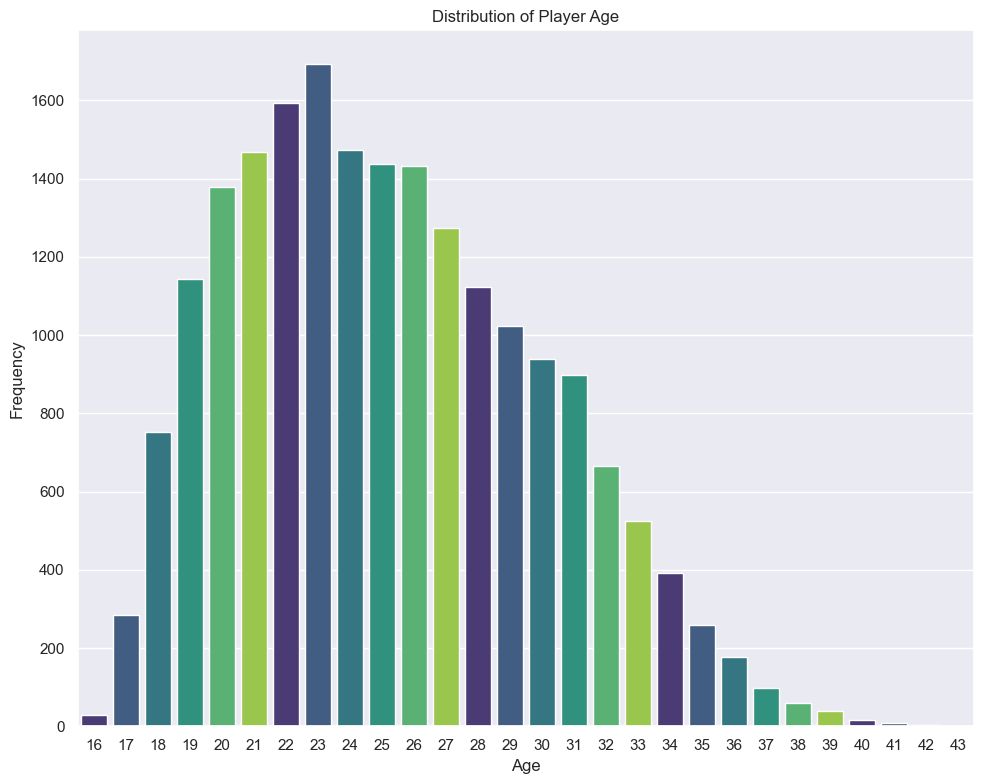

In [49]:
age_counts = df.groupby('age')['long_name'].count()
plt.figure(figsize=(10, 8))
sns.barplot(x = age_counts.index, y = age_counts.values,palette=sns.color_palette('viridis'), hue=age_counts.index, legend=False ) #We will use seaborn and matplotlib to visuzalize the age distribution.
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can notice that we have a skewed distribution for the age distribution. The mode is 23 years old.

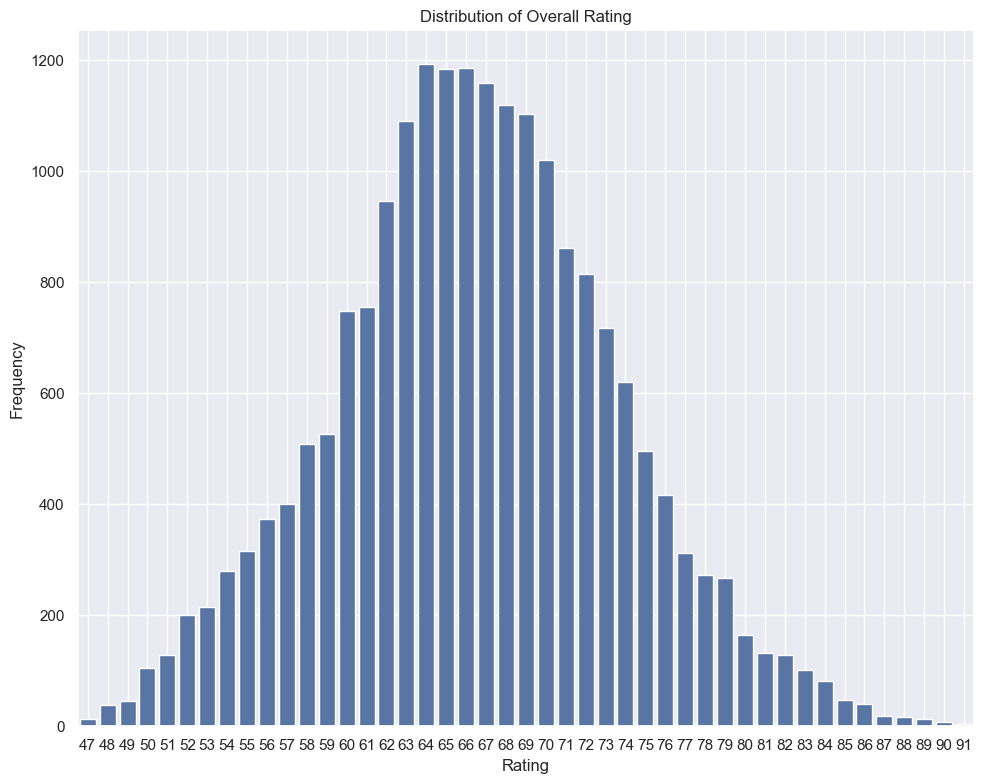

In [50]:
rating_counts = df.groupby('overall')['long_name'].count()
plt.figure(figsize=(10, 8))
sns.barplot(x = rating_counts.index, y = rating_counts.values, )
plt.title('Distribution of Overall Rating') #With the same libraries, let's dive into the overall distribution.
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

For the overall distribution, we can notice that it is almost a normal distribution; with a peak of players between 63 and 70 (that we could name the "average" players.)

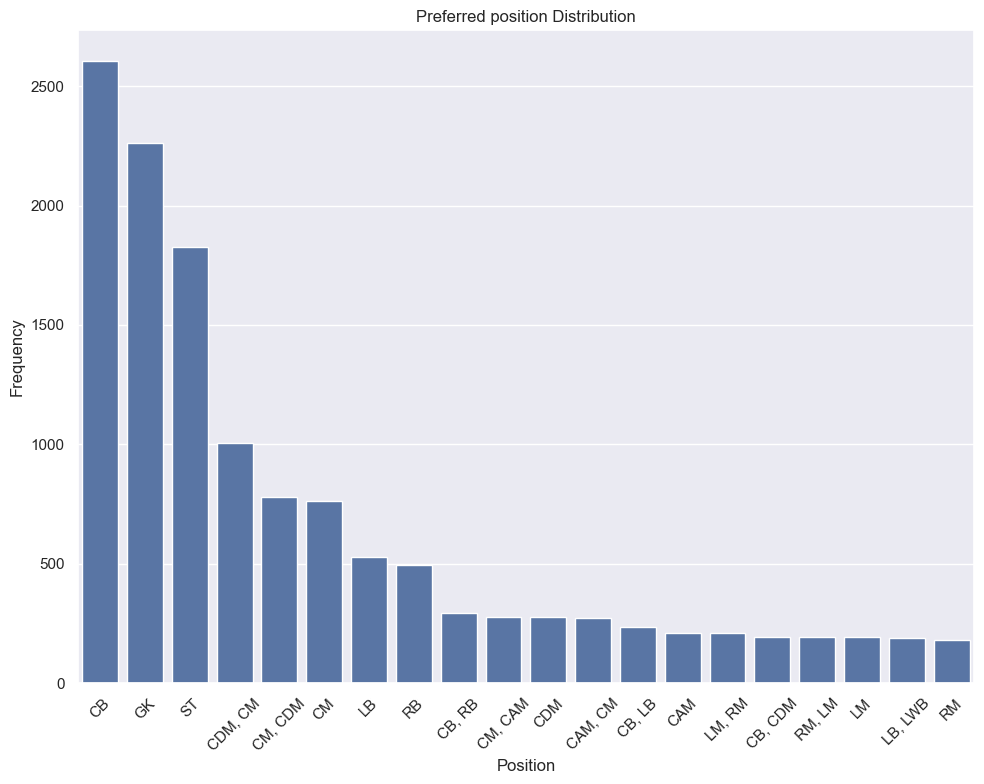

In [51]:
position_counts = df['player_positions'].value_counts(ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x = position_counts.index, y = position_counts.values)
plt.title('Preferred position Distribution')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see, the most represented position is Central Back (central defender). It makes sense since depending of the team formation, you will have between 2 and 3 Central Back starters (and so, more substitutes who can play at this position as well.).
The second one is the Goalkeeper. It is obvious that you can play without Left Midfielder for instance, but you must have one starting goalkeeper and one on the bench in every team !

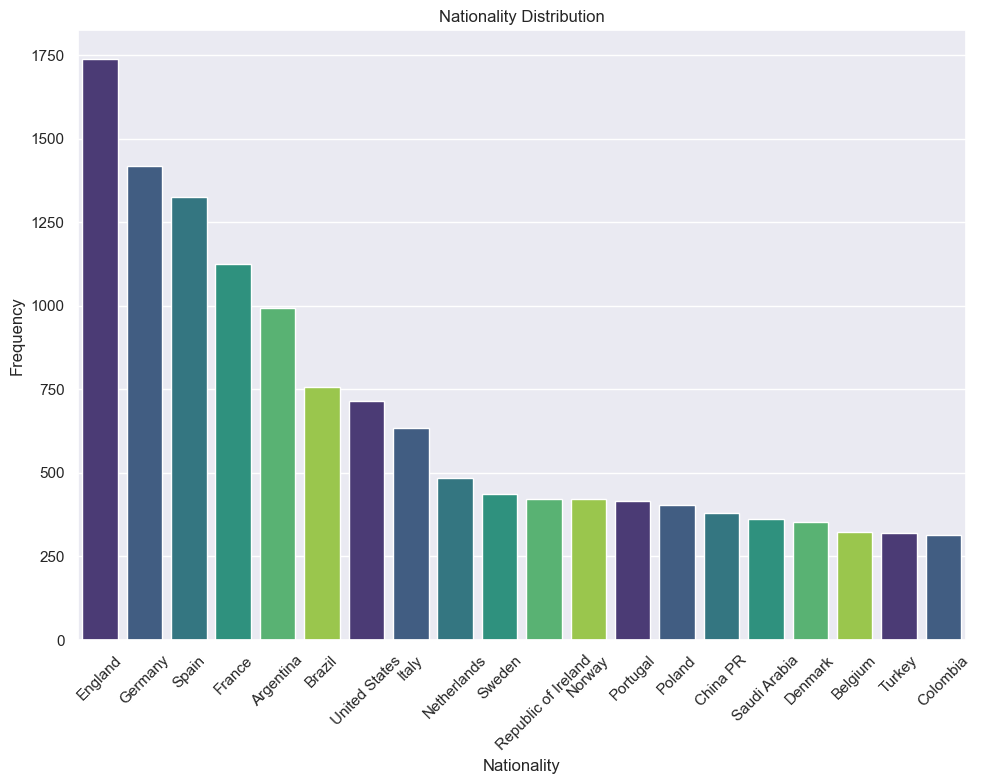

In [52]:
nationality_counts = df['nationality_name'].value_counts(ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x = nationality_counts.index, y = nationality_counts.values,palette=sns.color_palette('viridis'), hue=nationality_counts.index, legend=False)
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can explain these results with some context : In FIFA 24, the only lower divisions available in the game are the Championship (2nd division in England), League One (3rd one in England), League Two (4th one), Bundesliga 2 (2nd division in Germany), Liga 2 (2nd division in Spain) and Ligue 2 (2nd division in France).

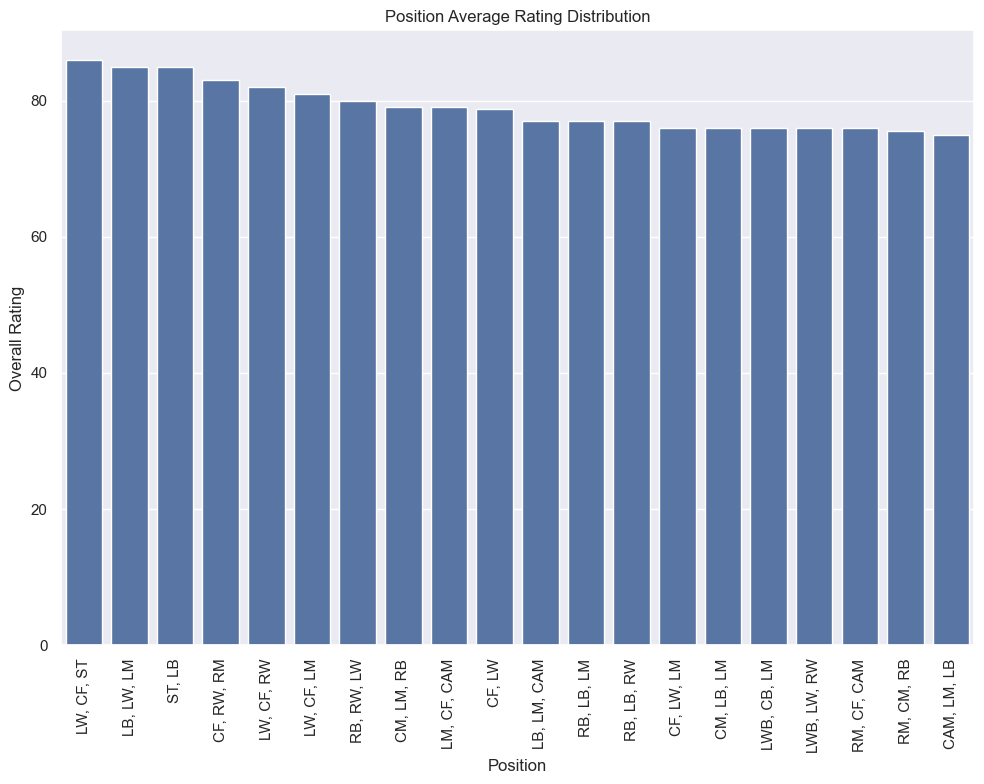

In [53]:
position_rating = df.groupby('player_positions')['overall'].mean().nlargest(20)
plt.figure(figsize=(10, 8))
sns.barplot(x = position_rating.index, y = position_rating.values)
plt.title('Position Average Rating Distribution')
plt.xlabel('Position')
plt.xticks(rotation = 90)
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

We can notice that globally, the positions with the best players in the game are the offensive ones (Left Winger, Right Winger, Central Forward, Striker).
As you may know, in football, we often use Goals scored and Assists as the main players statistics to judge which ones are the best (that could explain why it is almost everytime an offensive player who wins the Ballon D'Or).

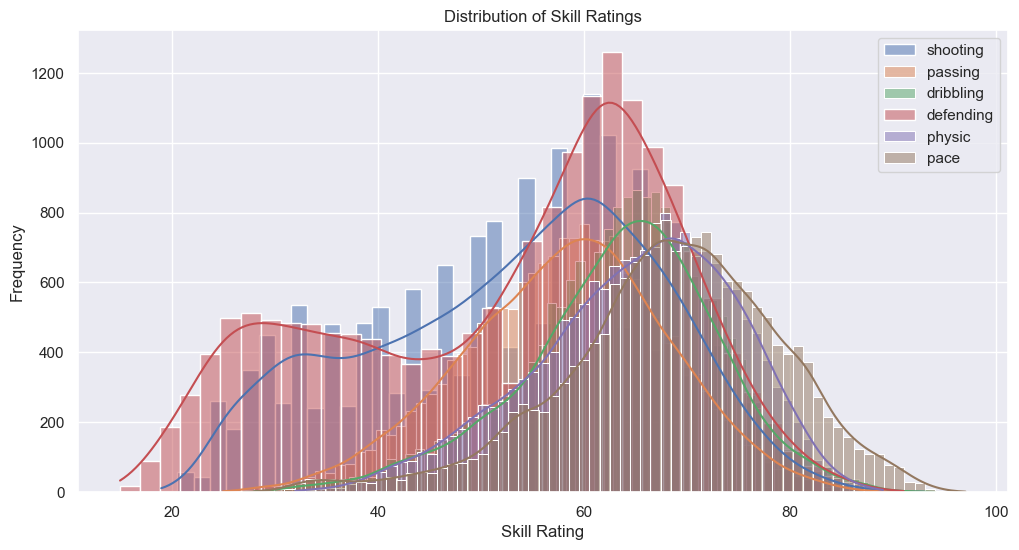

In [54]:
skill_columns = ['shooting', 'passing', 'dribbling', 'defending', 'physic', 'pace']
plt.figure(figsize=(12, 6))

for skill in skill_columns:
    sns.histplot(df[skill], kde=True, label=skill) #This time, we will draw multiple histogram plots with their KDE : The KDE (Kernel Density Estimator) is one of the most famous method for density estimation.

plt.title('Distribution of Skill Ratings')
plt.xlabel('Skill Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The skill which is generally the more developed for the players if the Pace (we could assume that it is because the pace mostly depends of the physical attributes of the players, and not of the technical attributes which are harder to strengthen.

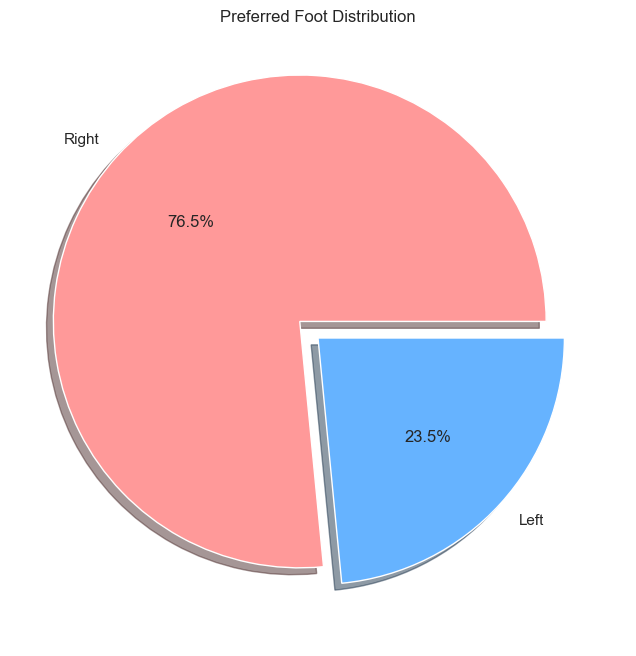

In [55]:
foot_count = df['preferred_foot'].value_counts()

colors = ['#ff9999', '#66b3ff']

explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(foot_count, labels=foot_count.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.title('Preferred Foot Distribution') #With a binary label such as the preferred foot (either Left or Right), I think it is a good idea to use a pie plot, to quickly understand the portion of each category !
plt.show()

While the percentage of lefties in the world population ranges from 10 to 13%, they are more represented in some sports. We can see that this is the case in football.

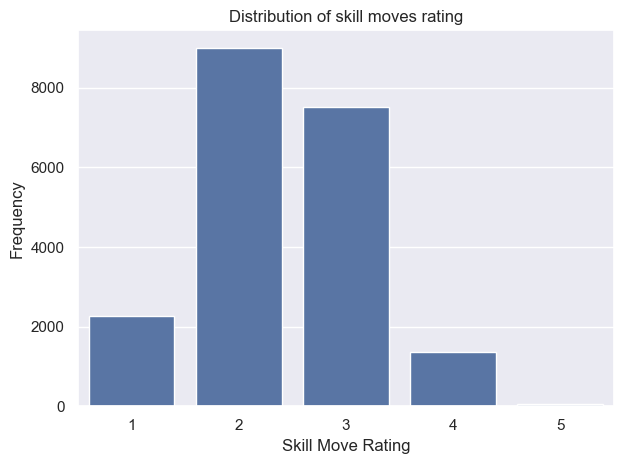

In [56]:
skill_counts = df['skill_moves'].value_counts()
sns.barplot(x = skill_counts.index, y = skill_counts.values)
plt.title('Distribution of skill moves rating')
plt.ylabel('Frequency')
plt.xlabel('Skill Move Rating')
plt.tight_layout()
plt.show()

This distribution of skill (dribbling) capacities makes sense. There are not a lot of players with only 1 Star (because these players would need to compensate this with a lot of other qualities to become professional), since the 4 and 5 stars are very rare, they are players who can make a huge impact with only one dribble, they often play for the top teams.
So basically, most of the players are "average", with 2 or 3 stars out of 5.

## 2. Questions

### 2.1. Question 1 : Which clubs have the best Economy* ?

Interpretation of Economy : How much quality player overall a Club can get for every Euro spent.

In [57]:
clubData = {'Club': df.club_name, 'League': df.league_name, 'Overall' : df.overall,
            'Wage': df.wage_eur} #We isolate the informations we will need for this study.

clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'League', 'Overall', 'Wage']) #We can create a new dataset only with the informations we had chosen before.

In [58]:
dct = dict(df.club_name.value_counts())
find_value_lambda = lambda x: dct[x] # Creation of lambda function

In [59]:
clubDataDf.dropna(inplace = True)
overallList = []
p = 0

''' Dividing the Overall of each row by the Club count so
 that when we do group by, we get the appropriate mean
 Overall value for the club ( kind a normalization )'''

for i in clubDataDf.values:
    overallList.append( i[2] / find_value_lambda( i[0] ) )

x = np.reshape(overallList, (len(overallList), 1))
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

new_club_df = new_club_data.groupby(by = 'Club',
                                      as_index=False).agg({'League': 'first', 'Wage': 'sum', 'Overall': 'sum'})
#This new dataframe is the aggregation of each club's wages and overalls.

new_club_df['Economy'] = new_club_df['Overall'] / new_club_df['Wage'] #We can now applied what we said, let's create a new label Economy which is the ratio between the sum of the club overalls and the amount of Euros they spend for wages.

In [60]:
top_10_clubs = new_club_df.sort_values(by=['Economy'], ascending=False).head(10)

In [61]:
ex.bar(x = top_10_clubs.Club, y = top_10_clubs.Economy,
       width = 650, height = 500, labels = {'y':'Economy', 'x':'Clubs'}, color = top_10_clubs.Economy)
# This time, we will use plotly which is a very useful library to create colorful and impactful plots.

Deportivo Binacional is the club which has the best Economy.
As a French Student (I notice that there are 2 women french clubs in the top 10 (!) with Lille W and Bordeaux W).

In [62]:
#We did an analysis by club, but it would be relevant to now work on the leagues.

league_avg_economy = new_club_df.groupby('League')['Economy'].mean().sort_values(ascending=False) #Now that we have the Economy label, it is very easy to use group by with the League label !

fig = ex.bar(league_avg_economy, title='Average Team Economy by League', template='plotly_white')
fig.show()

The league with the best mean Economy is Liga de Futbol Prof (Bolivia) !

From this plot, we can notice that the leagues with the best Economy are mostly the ones with the lowest reputation. Let's dive into this to better understand.

### Treemap of Teams by League

This treemap provides a hierarchical view of teams grouped by their leagues. The size of each team's box is proportional to its overall economy.

In [63]:
fig = ex.treemap(new_club_df, path=['League', 'Club'], values='Economy',
                 title='Treemap of Teams by League based on Economy')
fig.show() #You can click on every league to look its clubs' economy !

The results of this study can be explained quite simply.
It seems quite logical that the best ratios are found in so-called "secondary" leagues because the salaries that the players of the best world teams receive are not justified only by their sporting level but by other external factors such as communication, social networks, the sale of swimwear and merch, to dissuade competitors...
Between the best player of a Bolivian team and the best player of Real Madrid, we can find a salary gap of more than x1000. However, the Real Madrid player is not 1000x best in Football.

### 2.2. Question 2 :
- What is the relationship between age and individual potential of the player?
- How does age influence the players' value?

In [64]:
data = {'Age': df.age, 'Potential' : df.potential}

perf_df = pd.DataFrame(data, columns = ['Age', 'Potential']) #Same processus, we isolate the columns which will be useful and we create a new dataset only with these information.
ex.box(x = 'Age', y = 'Potential', data_frame = perf_df, color = 'Age', boxmode = 'overlay', notched =True)

From this boxplot, we can see that most of the players with the highest potential are young (< 30 yo.). However, there are a lot of outliers between 27 and 38 years old, who have anormal potential !

<Axes: xlabel='Age', ylabel='Potential'>

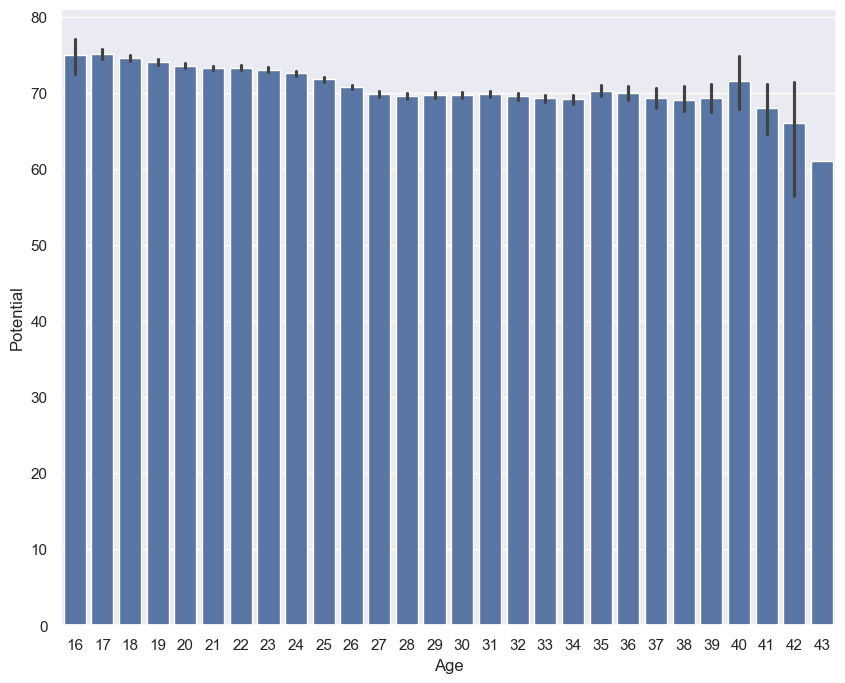

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Age', y = 'Potential', data = perf_df)

This one basically confirms what we had said before : we can find the highest potential players when they are under 25 years old. It seems that there is a negative correlation between the age and the potential.

In [66]:
scaler = StandardScaler()
# We will try to confirm our hypothesis of the negative correlation, using Scikit learn.
perf_df_standardised = scaler.fit_transform(perf_df[['Age','Potential']])
perf_df_standardised = pd.DataFrame(perf_df_standardised, columns = ['Age', 'Potential'])
perf_df_standardised.corr()

Age  Potential
Age        1.000000  -0.258079
Potential -0.258079   1.000000

<Axes: >

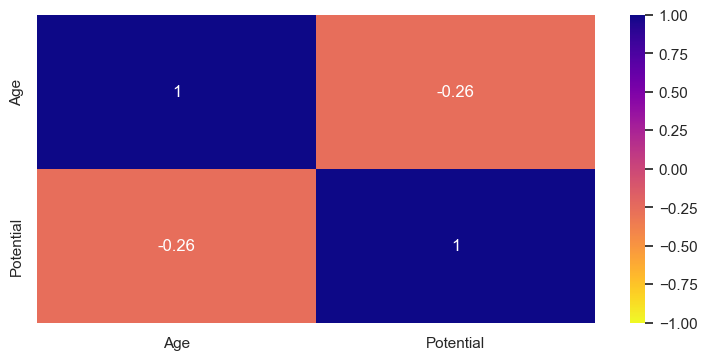

In [67]:
plt.figure(figsize = (9,4))
sns.heatmap(perf_df.corr(), vmin = -1, cmap = 'plasma_r', annot = True)

From Above Plots:
- We can observe that the Age is inversely proportional to the Potential of the player.
- A player shows average peak potential at the age of 17. After that it decreases until 28 and remain almost the same until the age of 40.
- There are also a lot of outliers which indicates that despite being of higher ager, some players show higher potential which is an exception for some cases.

In [68]:
perf_df['Value'] = df['value_eur']

ex.scatter(x = 'Age', y = 'Value', data_frame = perf_df,
           color = 'Age', opacity = 0.5, marginal_x = 'box')

There is a steep increase in the Value of a Player until the age of 24-25 years and after that it gradually starts decreasing. It hits the lowest at the age of 43 and the Value hits the highest at 24.

### 2.3. Question 3:
- Which attributes are helpful in deciding a player's potential?
- How do the traits contribute to the players' potential?

In [69]:
skill_df = df[["attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_ball_control","skill_curve","skill_dribbling",
                         "skill_fk_accuracy","skill_long_passing","movement_acceleration","movement_agility","movement_balance","movement_reactions","movement_sprint_speed","power_jumping",
                         "power_long_shots","power_shot_power","power_stamina","power_strength","mentality_aggression","mentality_composure","mentality_interceptions","mentality_penalties",
                         "mentality_positioning","mentality_vision","defending_marking_awareness","defending_sliding_tackle","defending_standing_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking",
                         "goalkeeping_positioning","goalkeeping_reflexes", "potential"]]
# We will try to work with all these precise attributes that we have in our dataset.


# replacing the null values with the minimum of the column values
for index in skill_df.columns :
    skill_df[index].fillna(value = skill_df[index].min(), inplace = True)

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_22582/194996855.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

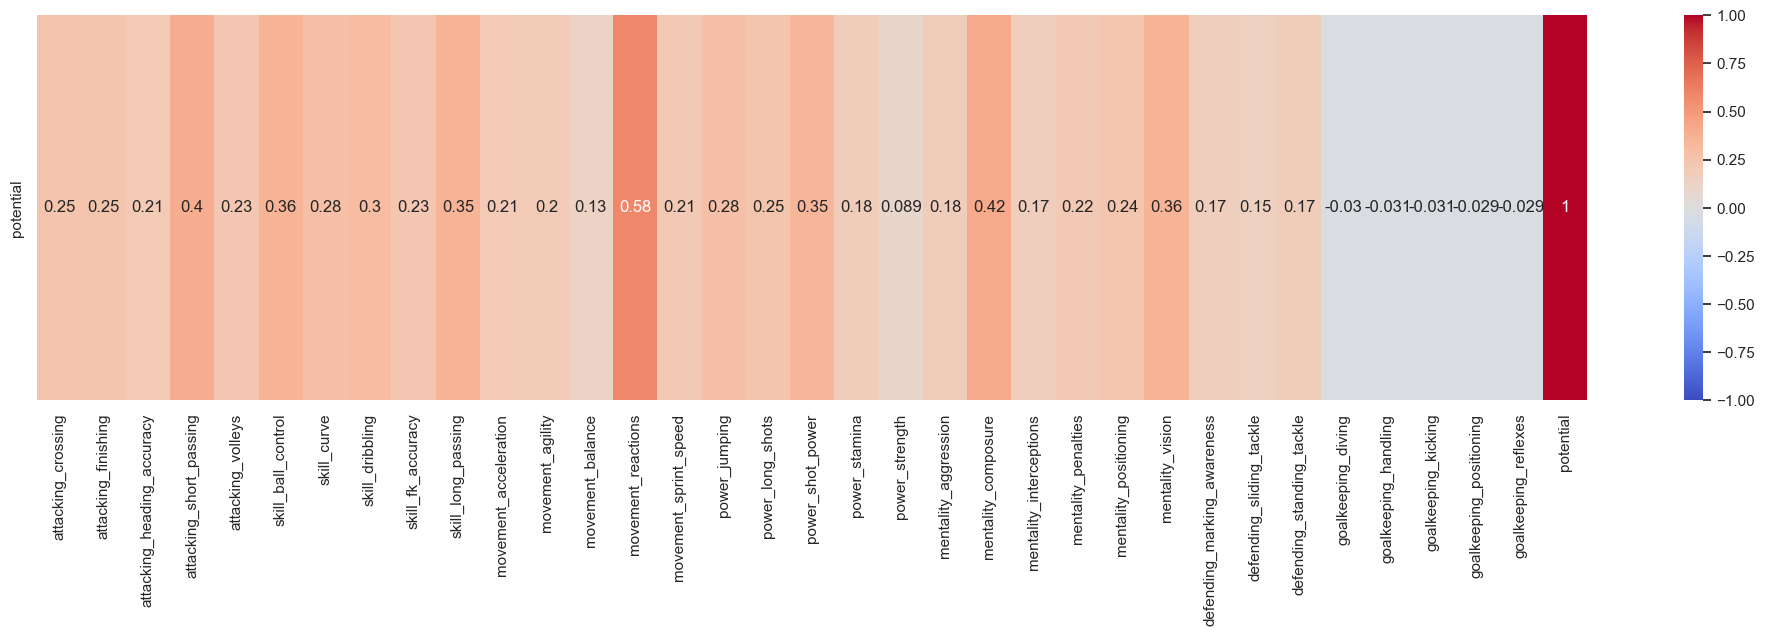

In [70]:
plt.figure(figsize=(25,5))
a = skill_df.corr().loc['potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)
# The heatmap is very useful to find the most correlated features with one of them ! (here: potential)

From the Heatmap, we can observe that Reactions, Composure, Vision, ShortPassing, LongPassing  and ShotPower are the columns which have comparatively greater impact on the Potential of a player

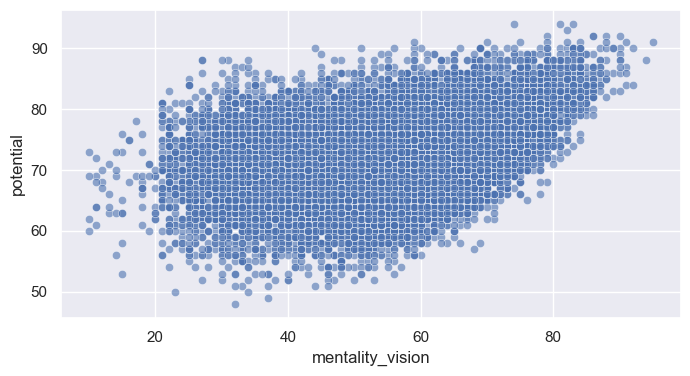

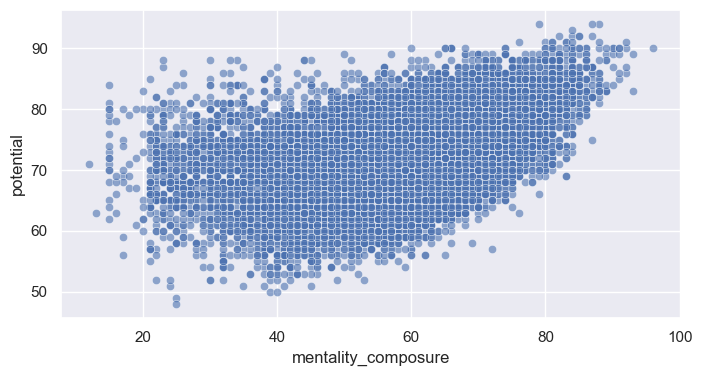

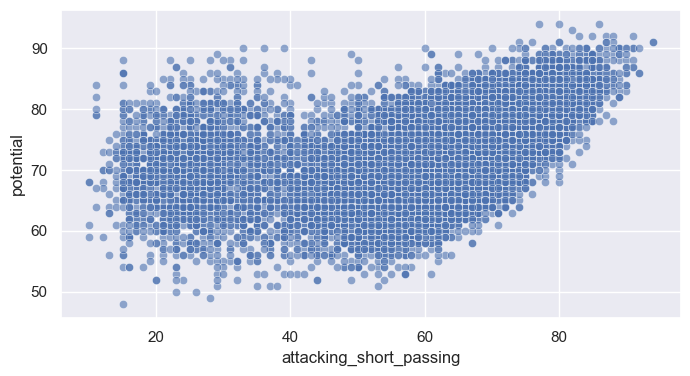

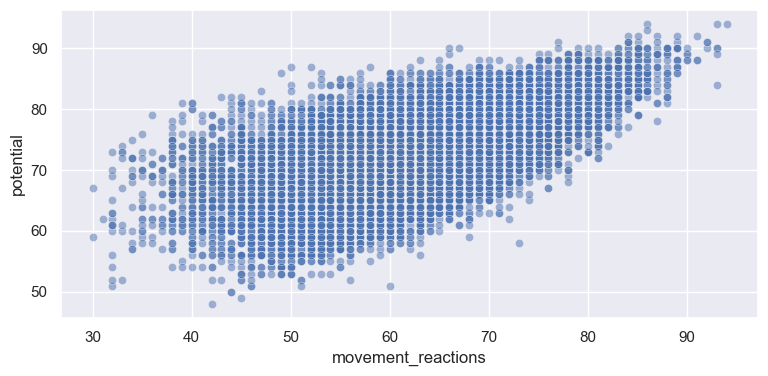

In [71]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'mentality_vision', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'mentality_composure', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'attacking_short_passing', y = 'potential', data = skill_df, alpha=0.6)
plt.show()
plt.figure(figsize=(9,4))
sns.scatterplot(x = 'movement_reactions', y = 'potential', data = skill_df, alpha=0.5)
plt.show() #With these plots, the aim is to see the distribution of these characteristics compared to the potential of the players.

From these graphs, we can observe that as we had before, these attributes are actually correlated with the potential of a player.

### 2.4. Question 4 :
- Which features directly contribute to the wages of the players?

In [72]:
wage_data = {'Potential' : df['potential'], 'Overall' : df['overall'], 'Value' : df['value_eur'],
             'Height' : df['height_cm'], 'Weight' : df['weight_kg'], 'International Reputation' : df['international_reputation'],
             'Wage' : df['wage_eur']}

# We will try a very similar study, but this time to figure out which characteristics define the wage of a player.
wage_df = pd.DataFrame(wage_data)

<Axes: >

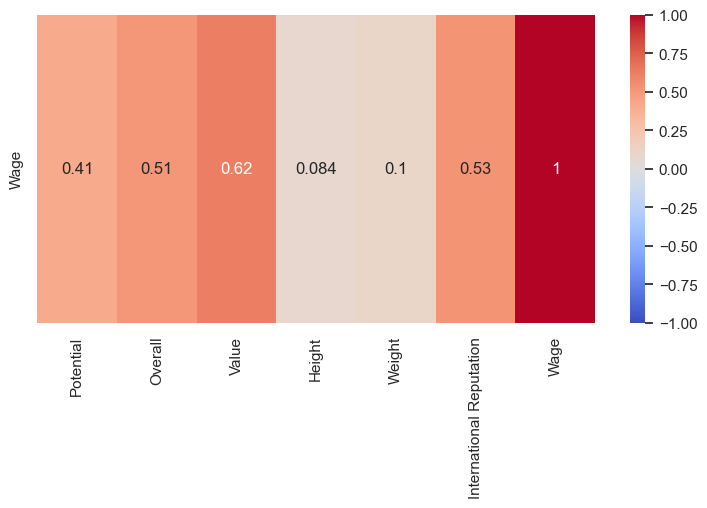

In [73]:
wage_corr_matrix = wage_df.corr().loc['Wage':]
plt.figure(figsize=(9,4))
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

So the most correlated characteristic is the Value, followed by International Reputation, Overall and only after these ones, potential.

<Axes: xlabel='Value', ylabel='Wage'>

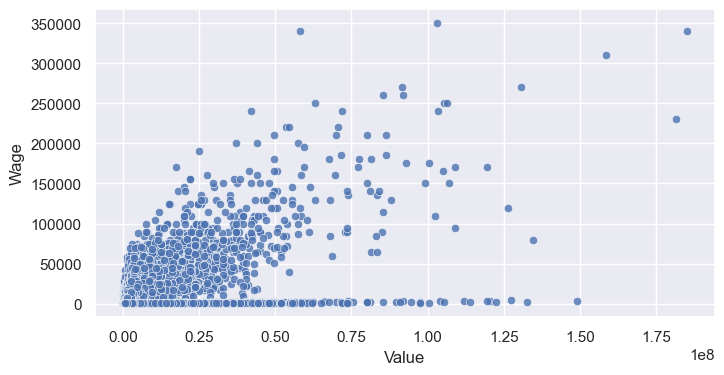

In [74]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Value', y ='Wage', data = wage_df, alpha=0.8)

So the Wage of a player is almost proportional to the Value of a player. If the value of the player increases, the wage of the player also increases.
From the heatmap, we can observe that the wage is mostly determined by the value, the international reputation and the overall, which means that the wage is more determined by the current level of the player than his potential, and that the height and the weight of the player are not factors for the wage.

<Axes: xlabel='International Reputation', ylabel='Wage'>

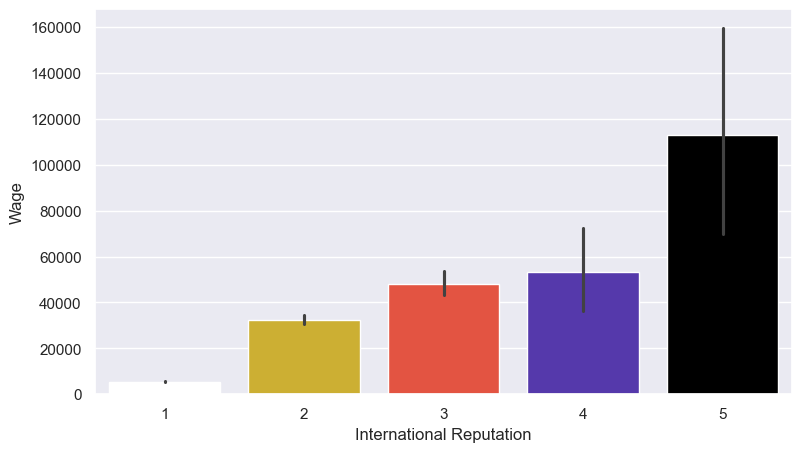

In [75]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'International Reputation', y ='Wage',
            palette='CMRmap_r' ,data = wage_df, hue='International Reputation', legend=False)

This bar plot is the confirmation that the international reputation is involved to determine the wage of a player.

### 2.5. Question 5:
- What is the age distribution in different clubs?
- Which club has most young players?

In [76]:
data = {'Age': df['age'], 'Club' : df['club_name']}
age_club_df = pd.DataFrame(data)

datas = age_club_df.groupby(by='Club', as_index=False).mean() #First of all, we use group by with Club to determine the average age of the players in every club.
datas = datas.sort_values(by = 'Age', ascending = True) #Then we just have to sort these averages.

datas.head(10)

Club        Age
666                   UCD  20.428571
696         Villarreal II  20.800000
108            Bordeaux W  21.100000
110  Borussia Dortmund II  21.185185
245           FC Volendam  21.300000
630      Stade de Reims W  21.400000
573              Salzburg  21.464286
264           Freiburg II  21.500000
461            Nürnberg W  21.600000
496   Peterborough United  21.720000

In [77]:
ex.bar(x = 'Club', y = 'Age', data_frame= datas.head(10),
      color='Club')

This graph provides several reserve teams (that makes sense since the professional team often make their young players with a high potential in their reserve teams). The teams (excluding the reserve ones) with the youngest players are UCD (Ireland), Bordeaux W (France), and Volendam (Netherlands).

## 3. Lineup Visualizations

Now, the objective will be to draw a field, to let an algorithm create the best team possible in the game, with the best formation possible, based on the criteria you want.

In [78]:
# adding the 'best_position' and 'value_million_eur' fields to each df
def add_position_and_value_fields(input_df):
    input_df['best_position'] = input_df['player_positions'].str.split(',').str[0]
    # about 1k players through FIFA version have no values associated - the NaN 'value_eur' values are replaced with 0
    input_df['value_eur'] = input_df['value_eur'].fillna(0)
    input_df['value_million_eur'] = pd.to_numeric(input_df['value_eur'], errors='coerce') / 1000000
    return input_df

df = add_position_and_value_fields(df)

In [79]:
from mplsoccer import VerticalPitch
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from matplotlib.font_manager import FontProperties
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

formations_dict = {'4-3-1-2': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '4-3-2-1': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CAM|CF', 'CF|ST'],
                   '4-3-3': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'RW|RF|ST', 'CF|ST', 'LW|LF|ST'],
                   '4-4-2': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '4-5-1': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '3-4-1-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '3-4-3': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RWB|RM', 'CDM|CM', 'CDM|CM', 'LWB|LM', 'RW|RF|ST', 'CF|ST', 'LW|LF|ST'],
                   '3-5-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RWB|RB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'LM|LWB|LB', 'CF|ST', 'CF|ST']}
#This dict contains the most popular formations in Football with their positions.

# dictionary used to calculate the player coordinates on the pitch, based on the number of players per team section such as defence, etc.
xaxis_locations = {1: [40], 2: [30, 50], 3: [25, 40, 55], 4: [10, 30, 50, 70], 5: [10, 25, 40, 55, 70]}


#If you don't have any computer science knowledge, you should go straight to the application of these functions. Indeed, it would be difficult for beginners to understand the creation of the algorithm, but just keep in mind that we use a lot of coordinates to draw a pitch and then put the players on it.
def get_players_section_coord_col(players_coord_dict, players_col_dict, color_val, players_in_section, yaxis_val, team_order):
    if team_order == 'home':
        xaxis_val = xaxis_locations
    elif team_order == 'away':
        xaxis_val = {k: v[::-1] for k, v in xaxis_locations.items()} # reversing the X-axis for the opponent lineup
        yaxis_val = 120 - yaxis_val # total pitch length is 120, so positions have the same distance from the own team's goal
    else:
        raise ValueError('Invalid team_order value provided - Can be only "home" or "away"')
    for idx, val in enumerate(range(players_in_section)):
        players_coord_dict[len(players_coord_dict)] = [xaxis_val[players_in_section][idx], yaxis_val]
        players_col_dict[len(players_col_dict)] = color_val
    return players_coord_dict, players_col_dict

def get_player_locations_colors(formation, team_type='home'):
    lineup_sections = formation.split('-')
    defenders = int(lineup_sections[0])
    midfielders = int(lineup_sections[1])
    if len(lineup_sections) == 4:
        trequartistas = int(lineup_sections[2])
        strikers = int(lineup_sections[3])
    elif len(lineup_sections) == 3:
        trequartistas = 0
        strikers = int(lineup_sections[2])
    if len(lineup_sections) not in [3, 4] or (defenders + midfielders + trequartistas + strikers) != 10:
        raise ValueError('Formation invalid - Missing or extra player sections other than defence, midfield, and offence')
    # getting the player locations and colors in two dictionaries that are gradually populated
    locations_dict = {}
    colors_dict = {}
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'darkslategrey', 1, 112, team_type) # Goalkeeper
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'blue', defenders, 98, team_type) # Defenders
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'gold', midfielders, 84, team_type) # Midfielders
    if trequartistas > 0:
        locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'red', trequartistas, 77, team_type) # Central attacking midfielders
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'red', strikers, 70, team_type) # Strikers
    return locations_dict, colors_dict

def get_best_formation(formation_df, club_name='', measurement='overall'):
    if club_name != '':
        formation_df = formation_df[formation_df['club_name'] == club_name]
    formations_total_vals = {}
    for formation in formations_dict:
        copied_df = formation_df.copy()
        pos_list = formations_dict[formation]
        total_vals = []
        for pos in pos_list:
            # get best record based on 'overall' or 'potential', then drop that record from copied df, so that it cannot be selected again
            if not np.isnan(copied_df[copied_df['best_position'].str.contains(pos)][measurement].max()):
                total_vals.append(copied_df[copied_df['best_position'].str.contains(pos)][measurement].max())
                copied_df.drop(copied_df[copied_df['best_position'].str.contains(pos)][measurement].idxmax(), inplace=True)
        if len(total_vals) == 11:
            formations_total_vals[formation] = sum(total_vals)
        else: # some formations might not find 11 available players - these ones need to be excluded from any possible calculation
            formations_total_vals[formation] = 0
    best_formation = max(formations_total_vals, key=formations_total_vals.get)
    return best_formation

def get_best_lineup(lineup_df, club_name='', formation='', measurement=''):
    if club_name != '':
        df_copy = lineup_df[lineup_df['club_name'] == club_name]
    else:
        df_copy = lineup_df.copy()
    # if formation is not chosen, then the best one is calculated with a formula
    if formation == '':
        formation = get_best_formation(lineup_df, club_name, measurement)
    squad_lineup = formations_dict[formation]
    squad_default_dict = dict()
    for pos in squad_lineup:
        best_player_record = df_copy.loc[[df_copy[df_copy['best_position'].str.contains(pos)][measurement].idxmax()]]
        squad_default_dict[best_player_record['short_name'].to_string(index=False).strip(' \t')] = [
            best_player_record['best_position'].to_string(index=False).strip(' \t'),
            int(best_player_record[measurement].to_string(index=False)),
            int(best_player_record['age'].to_string(index=False)),
            float(best_player_record['value_million_eur'].to_string(index=False)),
            best_player_record['club_name'].to_string(index=False).strip(' \t')]
        df_copy.drop(df_copy[df_copy['best_position'].str.contains(pos)][measurement].idxmax(), inplace=True)
    return formation, squad_default_dict

#Now, it is gonna be a lot of geometry to draw our pitch !
def draw_pitch(axis):
    # pitch outline and centre line
    pitch = Rectangle([0, 0], width=80, height=120, edgecolor='black', fill=False) # facecolor='#23E04F'
    # left and right penalty area and midline
    left_penalty = Rectangle([22.3, 0], width=35.3, height=14.6, fill=False)
    right_penalty = Rectangle([22.3, 105.4], width=35.3, height=14.6, fill=False)
    midline = ConnectionPatch([0, 60], [80, 60], 'data', 'data')
    # left and right six-yard box
    left_six_yard = Rectangle([32, 0], width=16, height=4.9, fill=False)
    right_six_yard = Rectangle([32, 115.1], width=16, height=4.9, fill=False)
    # prepare circles
    centre_circle = plt.Circle((40, 60), 8.1, color='black', fill=False)
    centre_spot = plt.Circle((40, 60), 0.4, color='black')
    # penalty spots and arcs around penalty boxes
    # left_pen_spot = plt.Circle((40, 9.7), 0.4, color='black')
    # right_pen_spot = plt.Circle((40, 110.3), 0.4, color='black')
    left_arch = Arc((40, 9.5), width=16.2, height=16.2, angle=90, theta1=310, theta2=50, color='black')
    right_arch = Arc((40, 110.4), width=16.2, height=16.2, angle=90, theta1=130, theta2=230, color='black')
    elements_list = [pitch, left_penalty, right_penalty, midline, left_six_yard, right_six_yard, centre_circle, centre_spot, left_arch, right_arch]
    for element in elements_list:
        axis.add_patch(element)

def draw_teams_matchup(home_df, away_df, home_title, away_title, home_team_name='', away_team_name='',
                       home_team_formation='', away_team_formation='', measurement='overall', drawn_pitch='manual'):
    # setting the figure where the matchup will be plotted
    fig = plt.figure()
    fig.set_size_inches(10, 14)
    ax = fig.add_subplot(1, 1, 1)
    if drawn_pitch == 'mplsoccer': # plotting the fancy pitch from 'mplsoccer'
        pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True)
        pitch.draw(ax=ax)
    else: # calling the function that draws the pitch
        draw_pitch(ax)
    # setting the field columns shown on the right-hand side of the figure
    if measurement == 'overall':
        note_columns = ('Position', 'Player Name', 'Overall Attribute', 'Age', 'Player Value (in €M)', 'Club Name')
    elif measurement == 'potential':
        note_columns = ('Position', 'Player Name', 'Potential Attribute', 'Age', 'Player Value (in €M)', 'Club Name')
    else:
        raise ValueError('Measurement value provided is not valid (nor "overall" neither "potential")')
    # drawing home team lineup
    home_formation, home_players = get_best_lineup(home_df, home_team_name, home_team_formation, measurement)
    home_players_list = list(home_players)
    home_locations_dict, home_colors_dict = get_player_locations_colors(home_formation, team_type='home')
    for i in range(len(home_players_list)):
        player_x, player_y = home_locations_dict[i][0], home_locations_dict[i][1]
        player_color = home_colors_dict[i]
        if '. ' in home_players_list[i]:
            player_name = home_players_list[i].split('. ', 1)[1]
        else:
            player_name = home_players_list[i]
        plt.annotate(player_name,
                     xy = (player_x, player_y), xytext = (0, 18),
                     bbox=dict(boxstyle='round', fc='w'), va='center', ha='center', textcoords='offset points')
        plt.scatter(player_x, player_y, s=250, c=player_color)
    # adding notes on the right-hand side of the home team
    home_team_list = []
    for k, v in home_players.items():
        home_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    home_sum_rating = home_sum_age = home_sum_value = 0
    for k, v in home_players.items():
        home_sum_rating = home_sum_rating + v[1]
        home_sum_age = home_sum_age + v[2]
        home_sum_value = home_sum_value + v[3]
    home_notes = [[home_title],
                  ['Average rating: {avg_rating}'.format(avg_rating=round((home_sum_rating/11), 1))],
                  ['Average age: {avg_age}'.format(avg_age=round((home_sum_age/11), 1))],
                  ['Total Value (in €M): {total_value:,}'.format(total_value=round(home_sum_value, 1))]]
    plt_table = plt.table(cellText=home_team_list, colLabels=note_columns,
                          colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5], cellLoc='right', loc='right', bbox=[1, 0.505, 1.7, 0.36])
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if (row == 0):
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    plt_home_notes = plt.table(cellText=home_notes, cellLoc='left', loc='left', bbox=[0.9, 0.87, 1.1, 0.12])
    for key, cell in plt_home_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    # drawing away team lineup
    away_formation, away_players = get_best_lineup(away_df, away_team_name, away_team_formation, measurement)
    away_players_list = list(away_players)
    away_locations_dict, away_colors_dict = get_player_locations_colors(away_formation, team_type='away')
    for i in range(len(away_players_list)):
        player_x, player_y = away_locations_dict[i][0], away_locations_dict[i][1]
        player_color = away_colors_dict[i]
        if '. ' in away_players_list[i]:
            player_name = away_players_list[i].split('. ', 1)[1]
        else:
            player_name = away_players_list[i]
        plt.annotate(player_name,
                     xy = (player_x, player_y), xytext = (0, 18),
                     bbox=dict(boxstyle='round', fc='w'), va='center', ha='center', textcoords='offset points')
        plt.scatter(player_x, player_y, s=250, c=player_color)
    # adding notes on the right-hand side of the away team
    away_team_list = []
    for k, v in away_players.items():
        away_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    away_sum_rating = away_sum_age = away_sum_value = 0
    for k, v in away_players.items():
        away_sum_rating = away_sum_rating + v[1]
        away_sum_age = away_sum_age + v[2]
        away_sum_value = away_sum_value + v[3]
    away_notes = [[away_title],
                  ['Average rating: {avg_rating}'.format(avg_rating=round((away_sum_rating/11), 1))],
                  ['Average age: {avg_age}'.format(avg_age=round((away_sum_age/11), 1))],
                  ['Total Value (in €M): {total_value:,}'.format(total_value=round(away_sum_value, 1))]]
    plt_table = plt.table(cellText=away_team_list, colLabels=note_columns,
                          colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5], cellLoc='right', loc='right', bbox=[1, 0.015, 1.7, 0.36])
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if (row == 0):
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    plt_away_notes = plt.table(cellText=away_notes, cellLoc='left', loc='left', bbox=[0.9, 0.38, 1.1, 0.12])
    for key, cell in plt_away_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    # adding the final settings to the plot
    plt.xlim(-2, 82)
    plt.ylim(-2, 122)
    plt.axis('off')
    plt.show()


### 3.1. Exemple 1

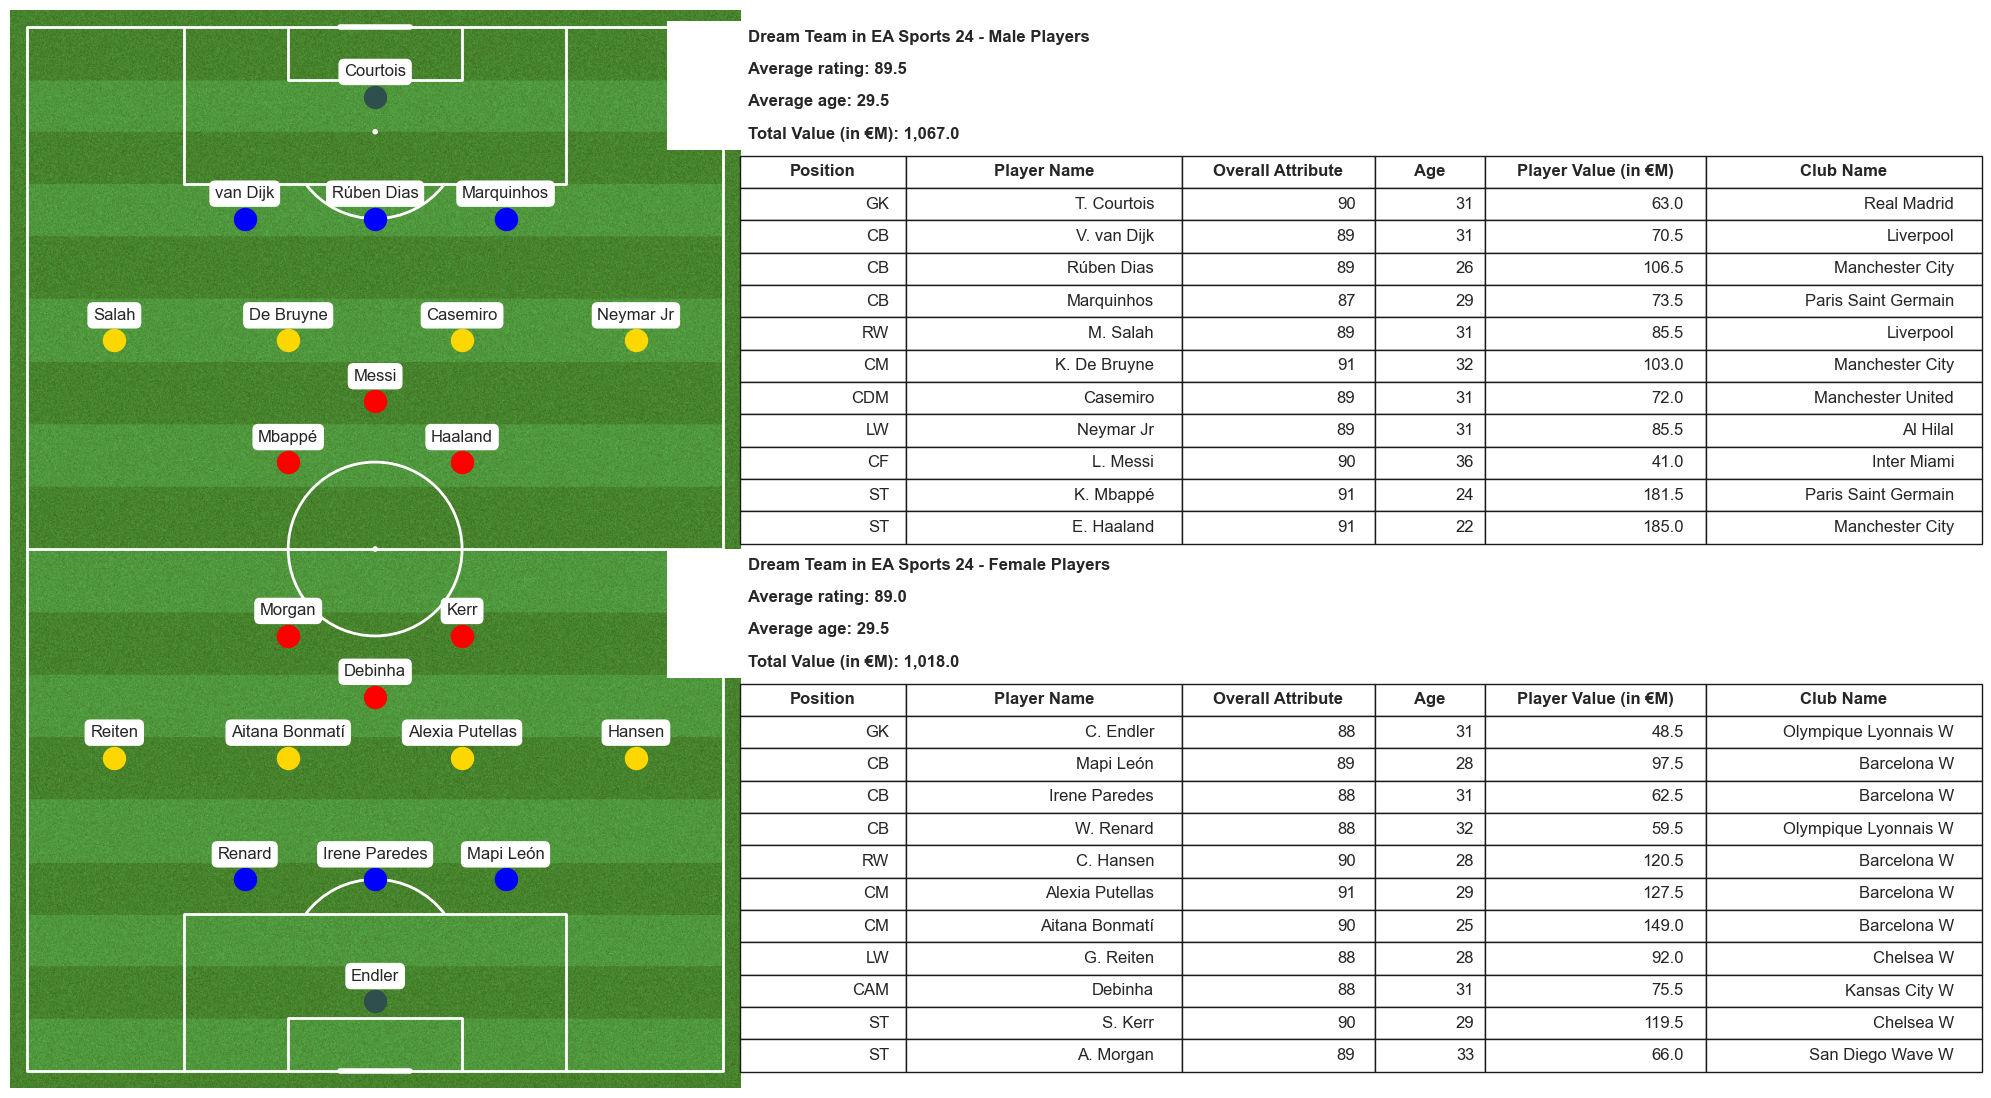

In [80]:
df["Potential difference"] = df["potential"] - df["overall"]

df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

draw_teams_matchup(df_male, df_female, 'Dream Team in EA Sports 24 - Male Players', 'Dream Team in EA Sports 24 - Female Players', drawn_pitch='mplsoccer')

### 3.2. Exemple 2

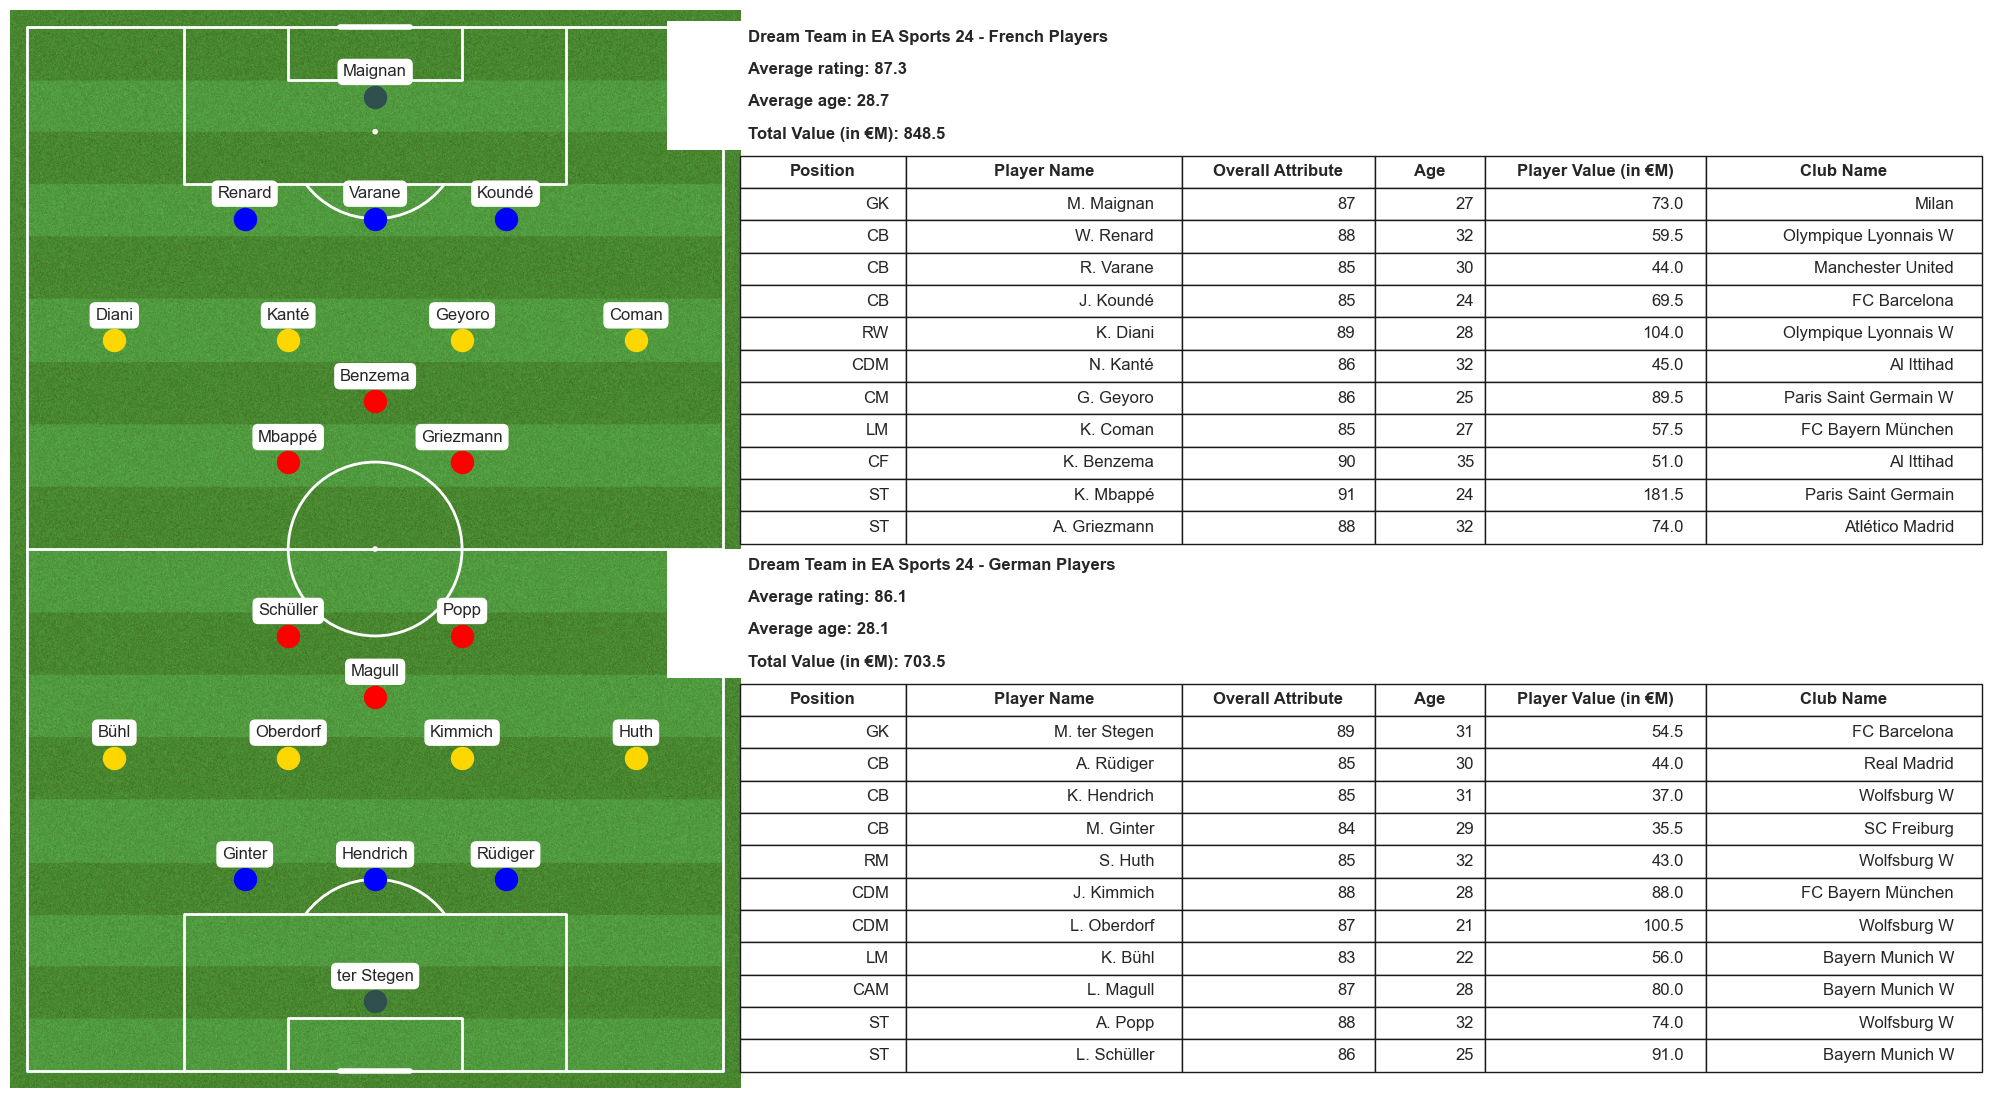

In [81]:
df_france = df[df['nationality_name'] == 'France']
df_germany = df[df['nationality_name'] == 'Germany']

draw_teams_matchup(df_france, df_germany, 'Dream Team in EA Sports 24 - French Players', 'Dream Team in EA Sports 24 - German Players', drawn_pitch='mplsoccer')

### 3.3. Exemple 3

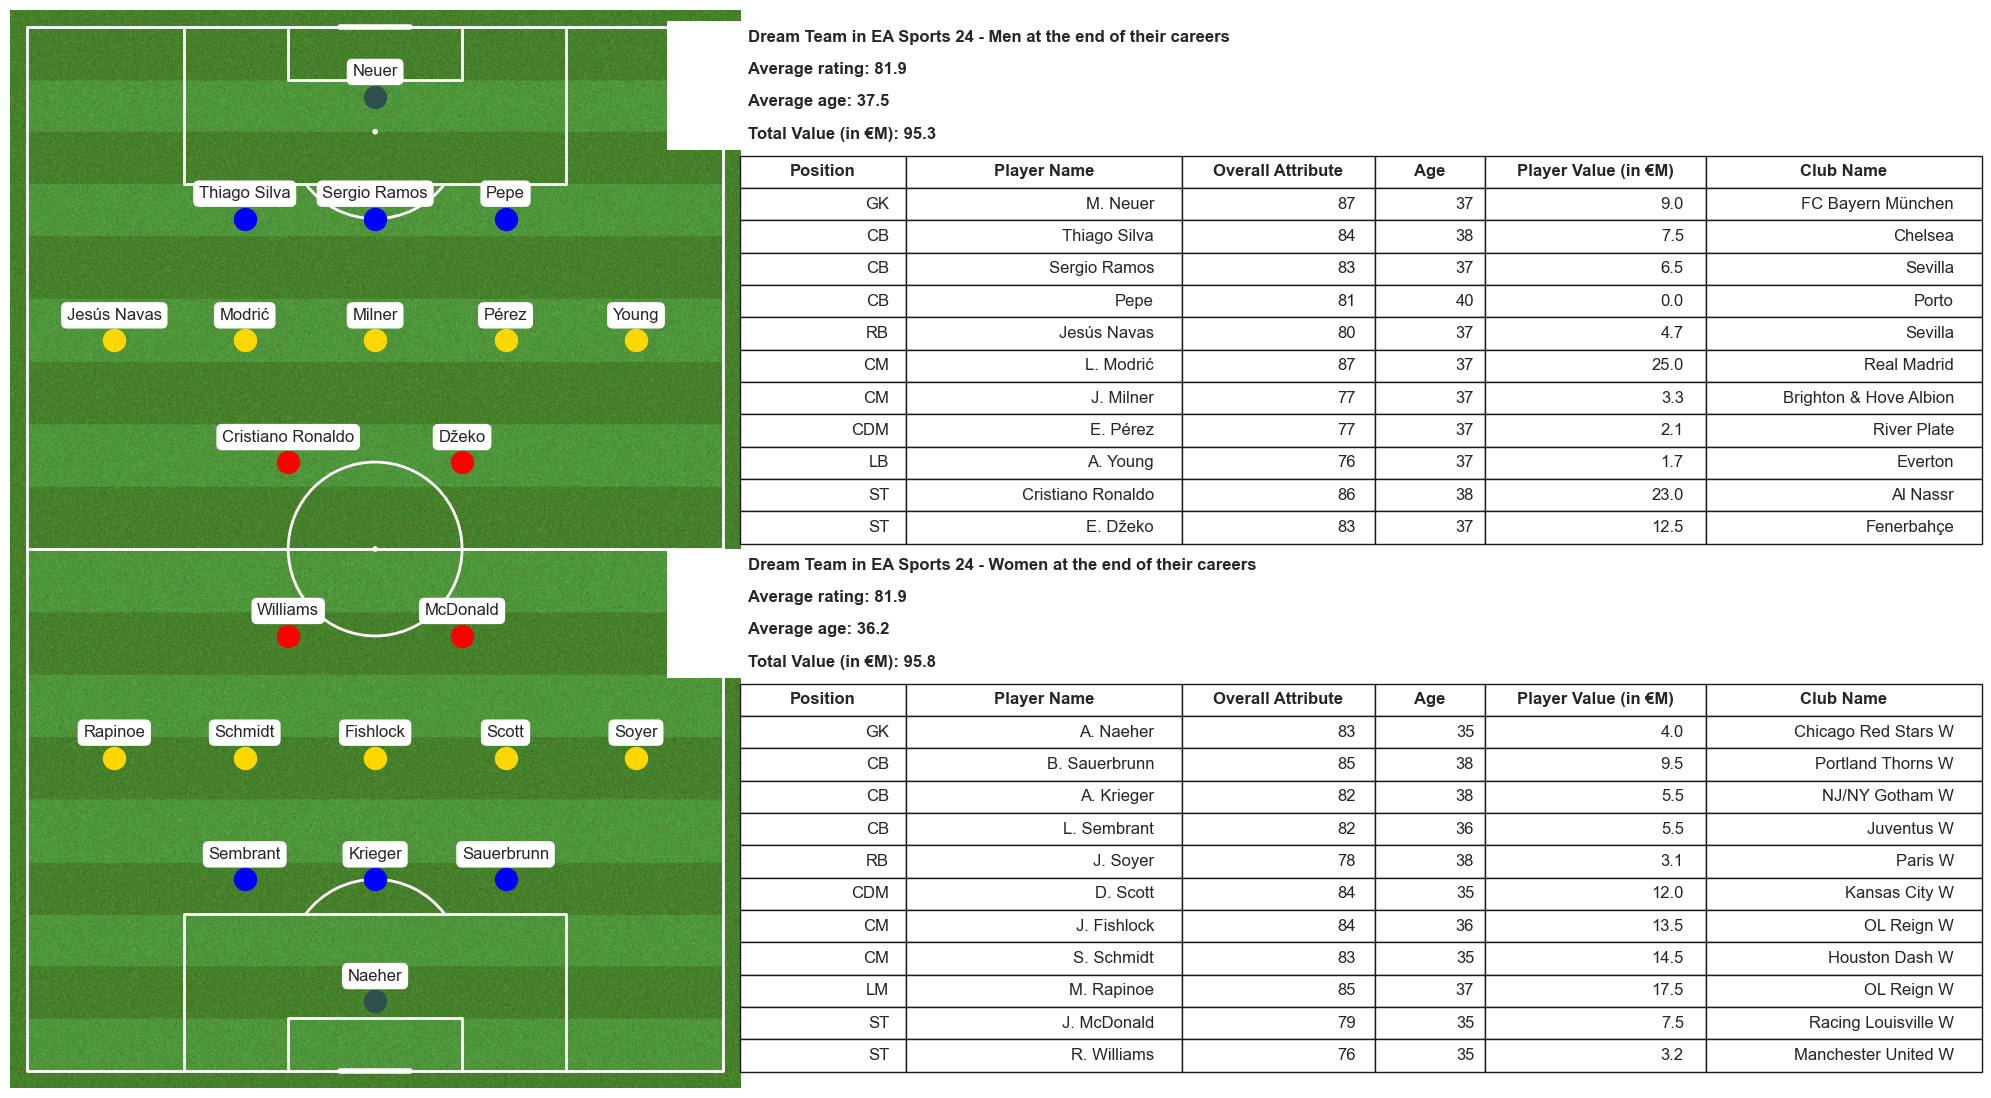

In [82]:
df_male_wonderkids = df_male[df_male["age"] > 36]
df_female_wonderkids = df_female[df_female["age"] > 34]

draw_teams_matchup(df_male_wonderkids, df_female_wonderkids, 'Dream Team in EA Sports 24 - Men at the end of their careers', 'Dream Team in EA Sports 24 - Women at the end of their careers', drawn_pitch='mplsoccer')

## 4. Gaps

We can identify several gaps that remain to be explored for the future:

- It would be interesting to create a man-machine interface to choose its criteria and obtain our visualisations.
- It might be interesting to look more deeply for example, to get the best team possible, with a team quality/value ratio.
- Ability to create a dataset, with information drawn from the real world and no longer from FIFA, via webscraping, to apply these visualizations to real player performance.